In [1]:
import json
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.aggregator import create_plot_group_topvecs

pd.set_option('display.max_colwidth', -1)

C:\Users\risto\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # This is added back by InteractiveShellApp.init_path()


## Data

In [2]:
df=pd.read_csv('data/interim/stenos_cleaned_topics.csv')
df.shape

(209949, 22)

In [3]:
df=df[~pd.isnull(df.speaker)]
df.shape

(209938, 22)

In [4]:
df_topic_clusters=pd.read_excel('data/interim/riigikogu_topics_clusters.xlsx')
df_topic_clusters.shape

(1152, 8)

## Colors for plots

In [5]:
colors=json.loads(Path('utils/colors.json').read_text())
colors=list(colors.keys())[10:]

## Non-informative clusters and topics

In [6]:
#detected by plotting data and visually inspectig topic names
clusters_noninform=[0,1, 4, 5, 9, 10,14,15,16]
topics_noninform=[1, 2, 3, 22, 96, 122, 844, 589, 1059, 140, 408,
                 420, 539, 423, 314, 1079, 568, 190, 987, 21, 287]

In [7]:
#save for future use
pd.DataFrame(clusters_noninform).to_csv('data/interim/noninform_clusters.csv', index=False)
pd.DataFrame(topics_noninform).to_csv('data/interim/noninform_topics.csv', index=False)

In [8]:
df_inform=df[(~df.topic_cluster.isin(clusters_noninform))&(~df.topic_id.isin(topics_noninform))]
df_inform.shape

(96770, 22)

## Save informative data

In [9]:
df_inform.to_csv('data/interim/stenos_cleaned_topics_inform.csv', index=False)

## Topic cluster dynamics

In [9]:
def plot_topic_time_dynamics(df, cluster_id=None, cluster_col='topic_cluster', time_col='year', topic_col='topic_words3',
                            figsize=(15,10), colors=colors, bbox_to_anchor=(1.1, 1.05), normalize_timesteps=False,
                            use_percentage=True):
    """function to plot topics time dynamics 
    -INPUT:
        -df: pd.DataFrame containing data, eahc row is some speaker text at some time
        -cluster_id: if not None then int with topic cluster id used for plotting
        -cluster_col: str: name of the data cluster column
        -time_col: str of the data time column
        -topic_col: str of the data topic column
        -figsize: tuple of plot size
        -color: list of colornames/codes used for plotting
        -bbox_to_anchor: tuple of legend position
        -normalize_timesteps: bool, if True normalizes data in each timestep (takes % of topics),
            useful for stacked are chart
        -use_percentage: bool, if not True counts each timestamp different topics and plots the scale of counts,
            otherwise plots the scale as %
    -OUTPUT:
        -plot of df topics (of cluster topics) dynamics"""
    fig, ax = plt.subplots(figsize=figsize)

    if not normalize_timesteps:
        df_topic_prop = df.groupby([time_col])[topic_col].\
            value_counts(normalize = use_percentage).\
            unstack()
        #keep only cluster topics for plotting
        if cluster_id is not None:
            df=df[df[cluster_col]==cluster_id]
        topic_cluster_names=df[topic_col].unique()
        columns2keep = topic_cluster_names
        df_topic_prop = df_topic_prop[columns2keep]
        df_topic_prop = df_topic_prop.reindex(sorted(df_topic_prop.columns), axis=1)
        ax = df_topic_prop.plot.area(ax=ax, color=colors)
    
    if normalize_timesteps:
        if cluster_id is not None:
            df=df[df[cluster_col]==cluster_id]
        df_plot=df.groupby([time_col])[topic_col].\
            value_counts(normalize = use_percentage).\
            unstack()
        df_plot = df_plot.reindex(sorted(df_plot.columns), axis=1)
        df_plot.plot.area(ax=ax, color=colors)
    
    ax.legend(bbox_to_anchor=bbox_to_anchor)

Topic cluster segment counts

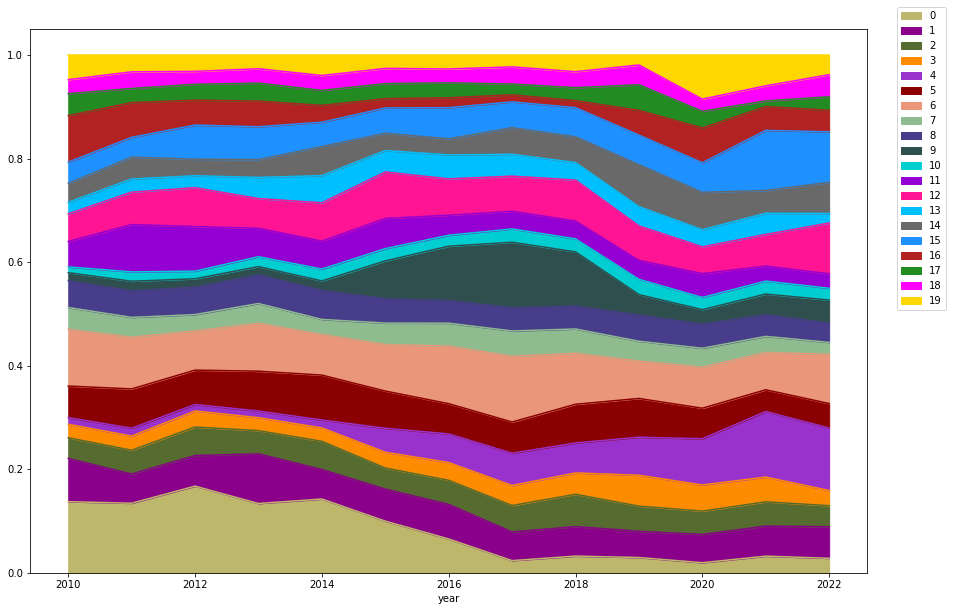

In [14]:
#topic cluster counts
plot_topic_time_dynamics(df,topic_col='topic_cluster', use_percentage=True, normalize_timesteps=True)

Topic cluster porportions

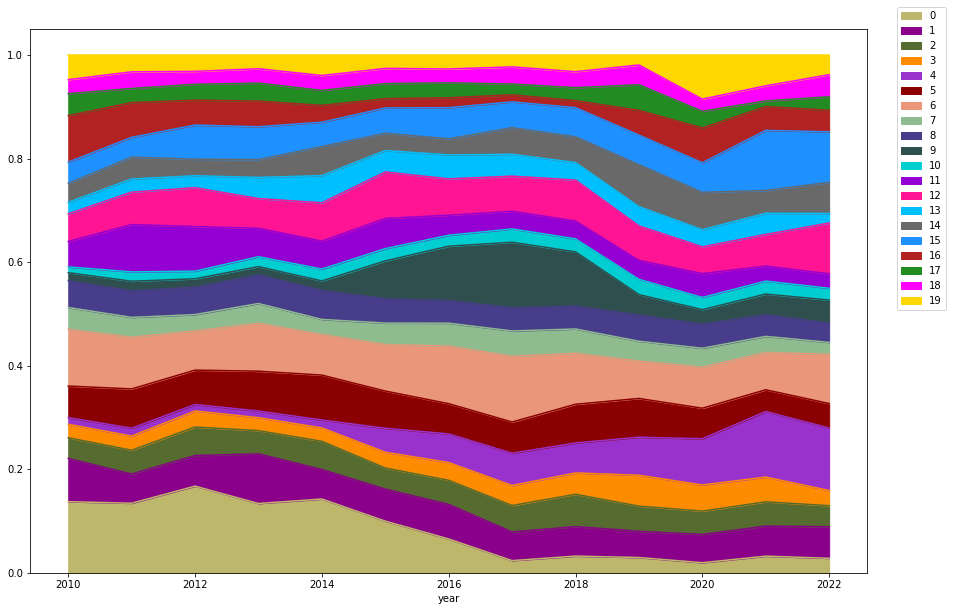

In [15]:
#topic cluster proportions
plot_topic_time_dynamics(df,topic_col='topic_cluster')

Informative topic cluster counts

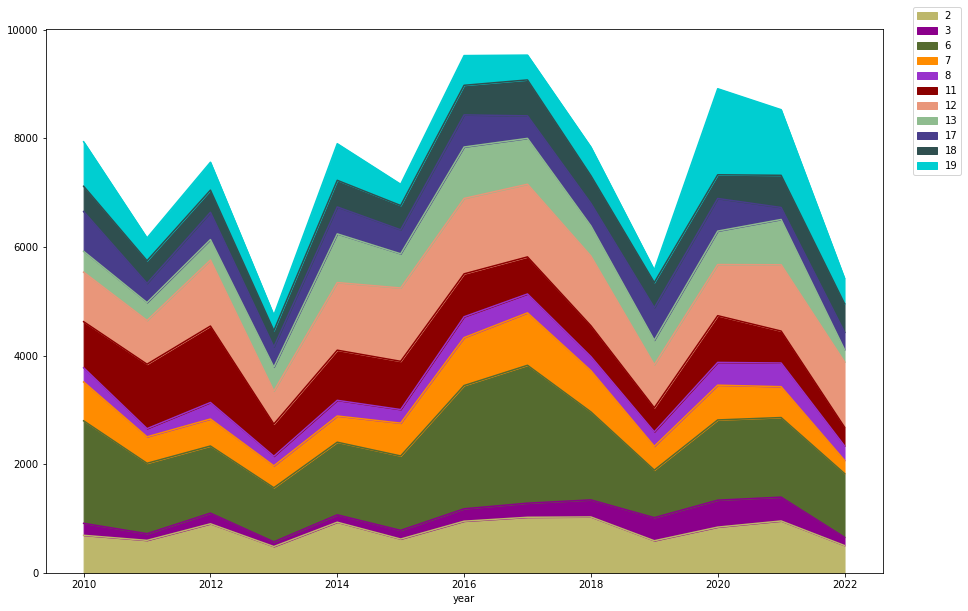

In [13]:
#keeping only informative clusters, topics
plot_topic_time_dynamics(df_inform,topic_col='topic_cluster', use_percentage=False)

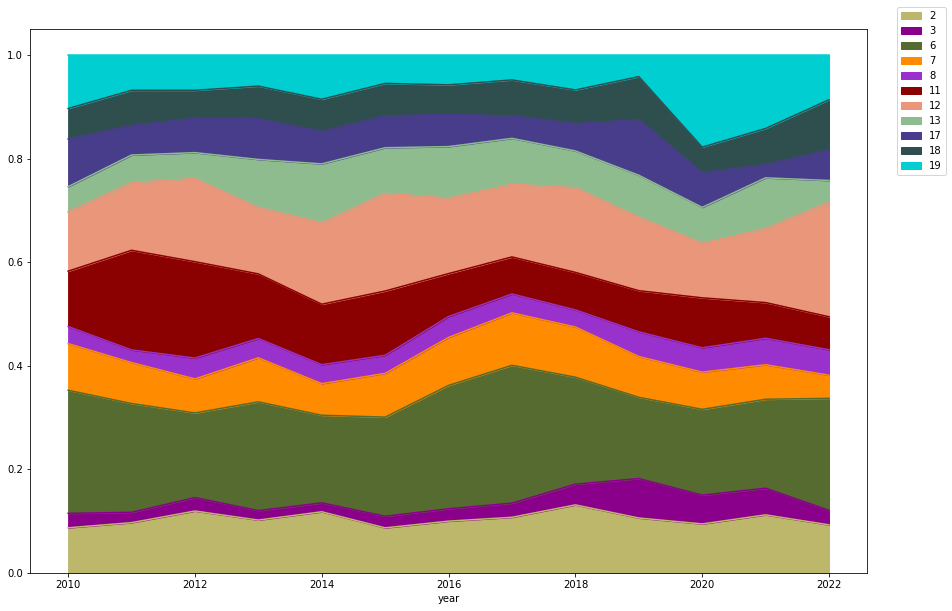

In [14]:
#Informative topic cluster proportions
plot_topic_time_dynamics(df_inform, topic_col='topic_cluster', use_percentage=True)

## Some cluster topics dynamics

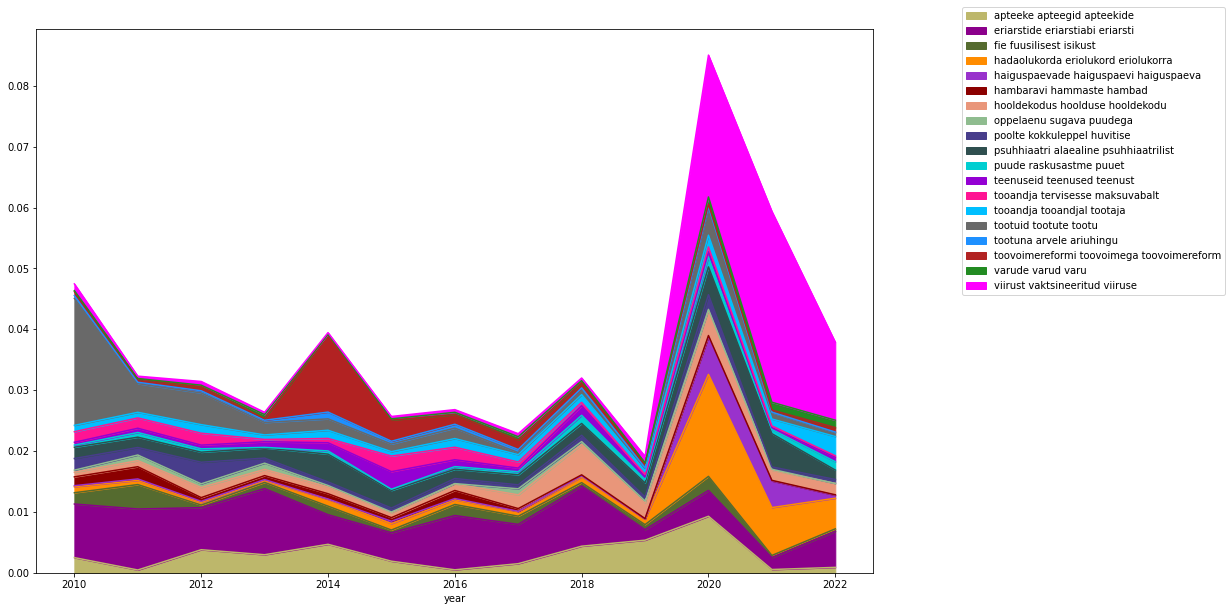

In [15]:
cluster_id=19
plot_topic_time_dynamics(df, cluster_id)

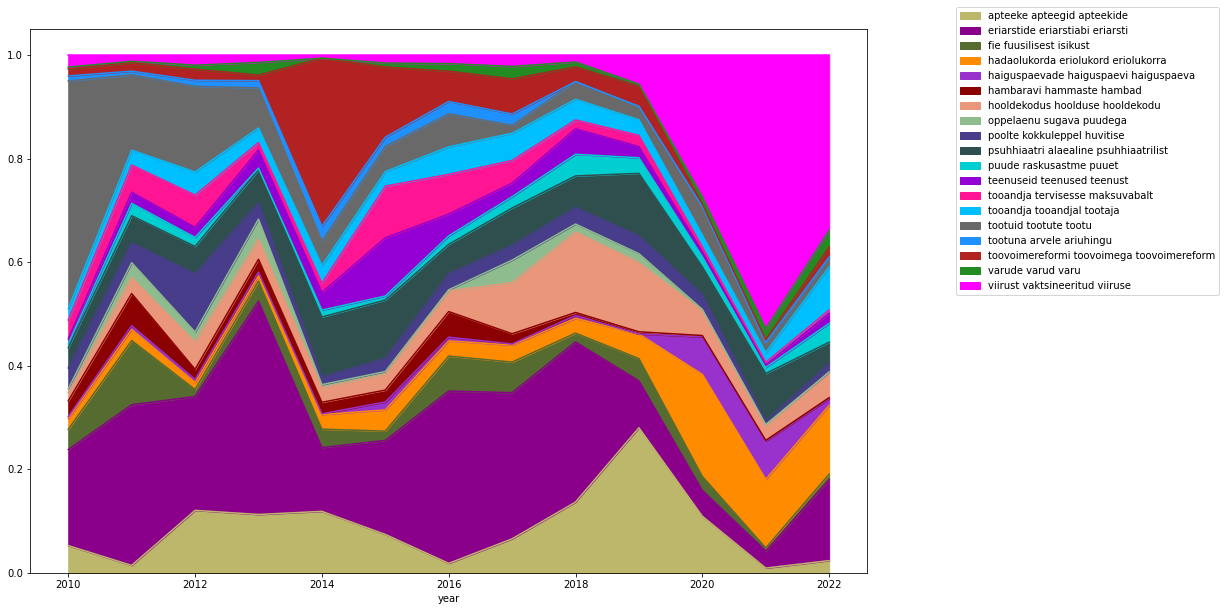

In [17]:
cluster_id=19
plot_topic_time_dynamics(df, cluster_id, normalize_timesteps=True)

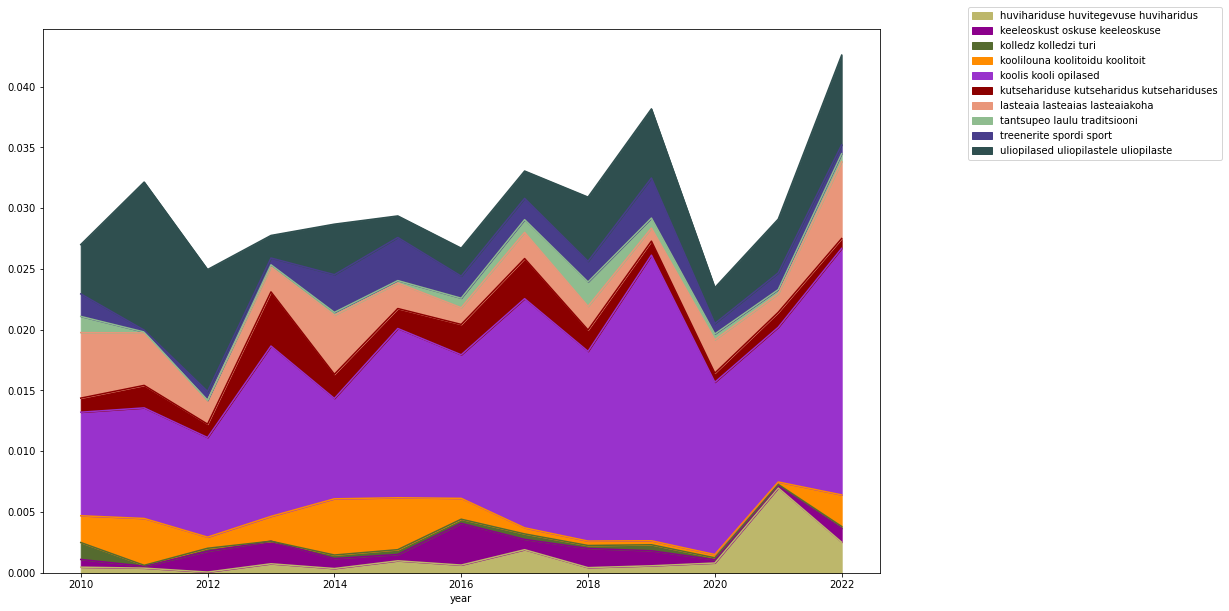

In [17]:
cluster_id=18
plot_topic_time_dynamics(df, cluster_id)

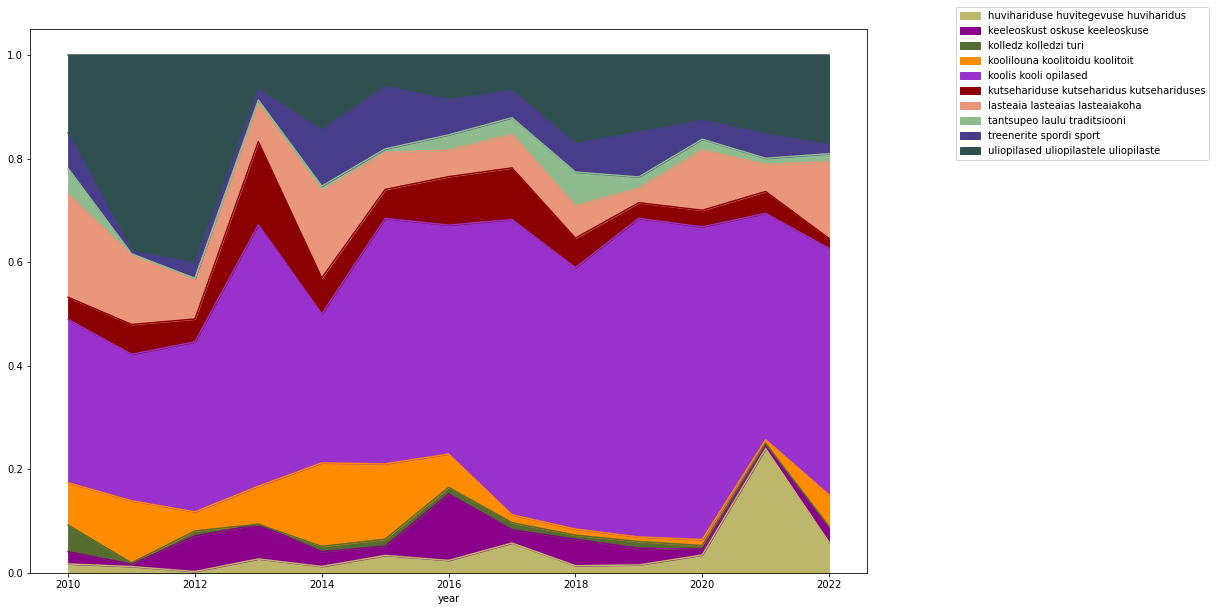

In [18]:
cluster_id=18
plot_topic_time_dynamics(df, cluster_id, normalize_timesteps=True)

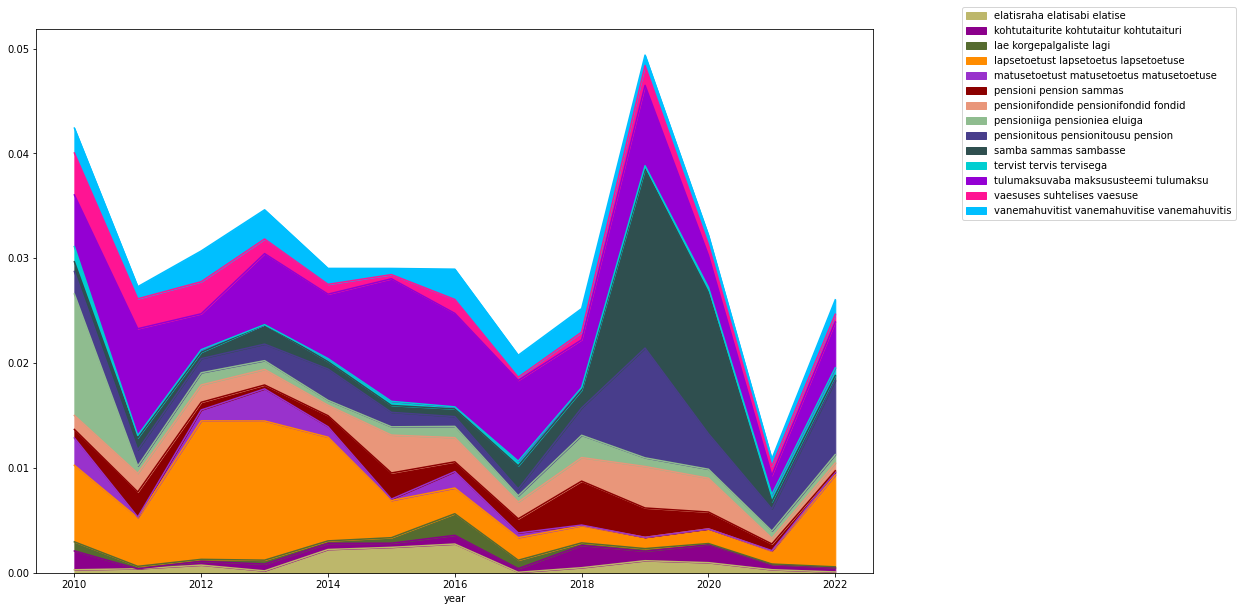

In [19]:
cluster_id=17
plot_topic_time_dynamics(df, cluster_id)

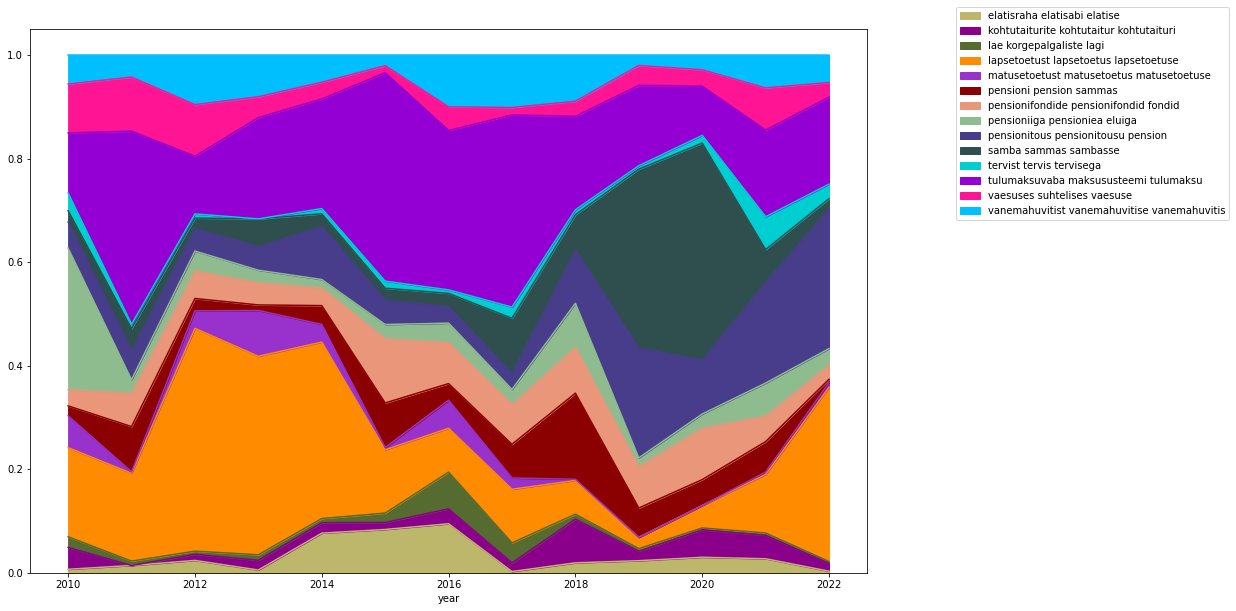

In [20]:
cluster_id=17
plot_topic_time_dynamics(df, cluster_id, normalize_timesteps=True)

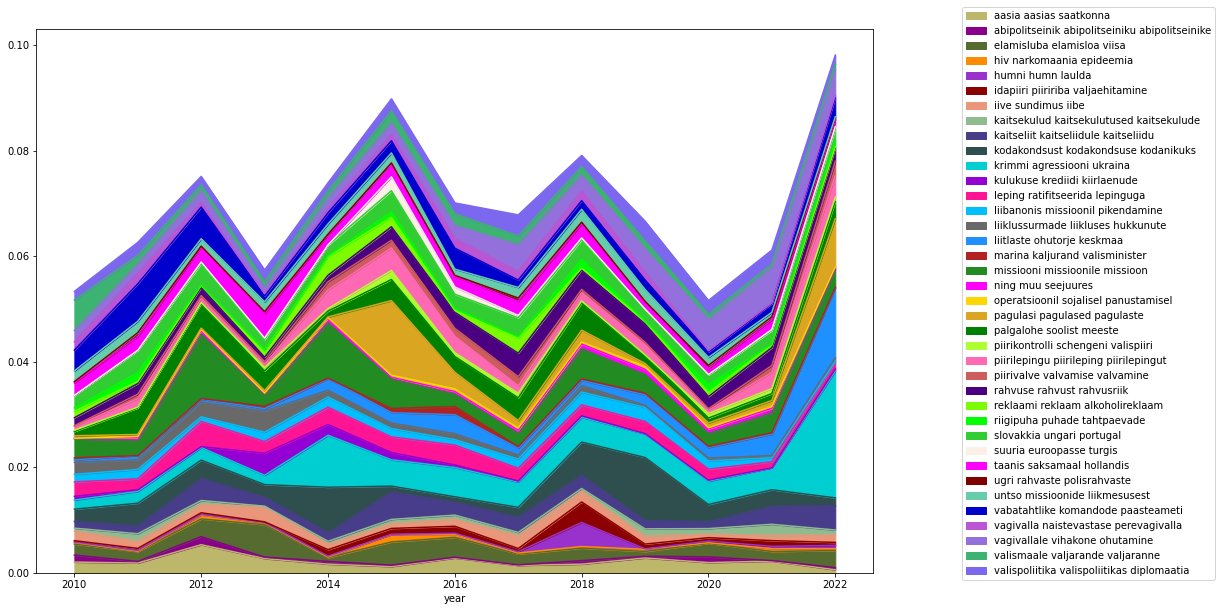

In [21]:
cluster_id=12
plot_topic_time_dynamics(df, cluster_id)

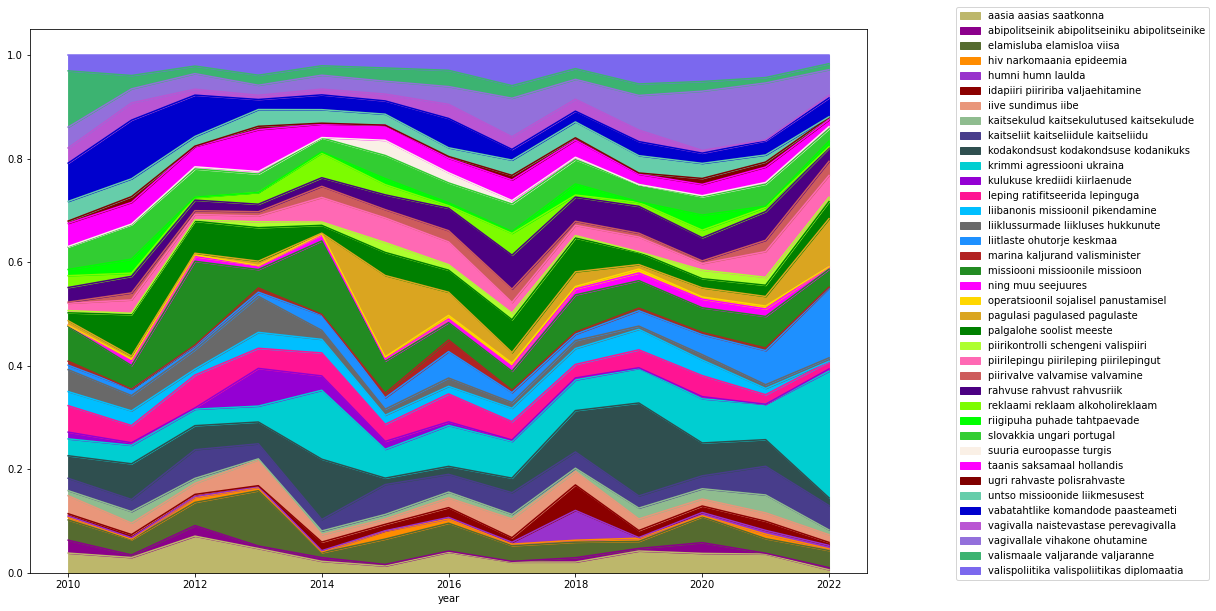

In [22]:
cluster_id=12
plot_topic_time_dynamics(df, cluster_id, normalize_timesteps=True)

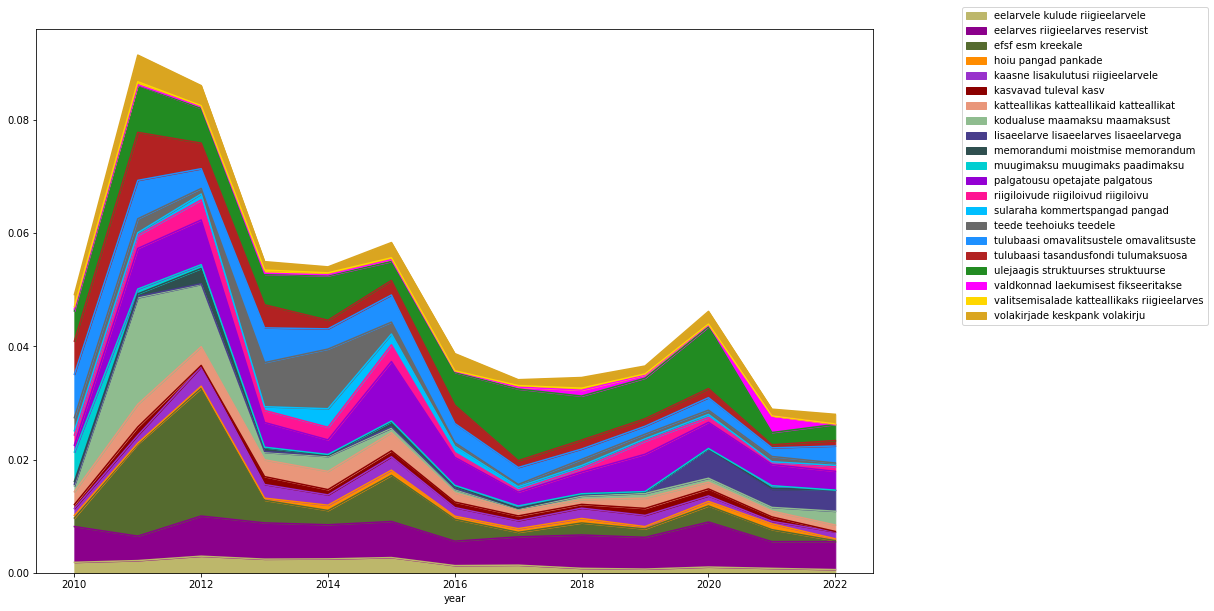

In [23]:
cluster_id=11
plot_topic_time_dynamics(df, cluster_id)

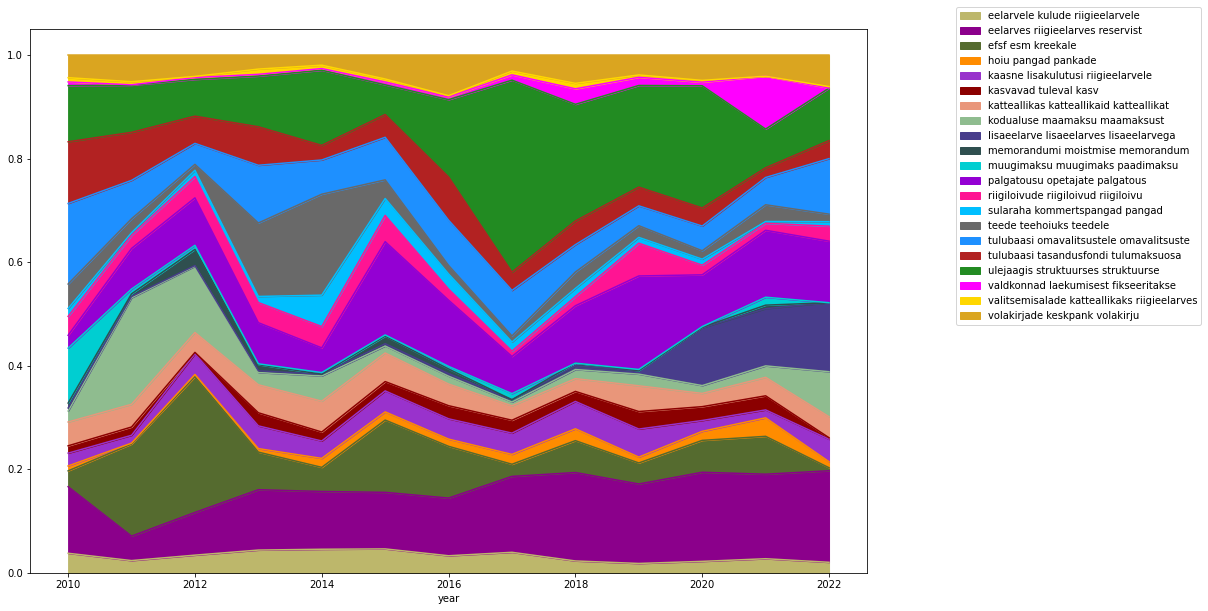

In [24]:
cluster_id=11
plot_topic_time_dynamics(df, cluster_id, normalize_timesteps=True)

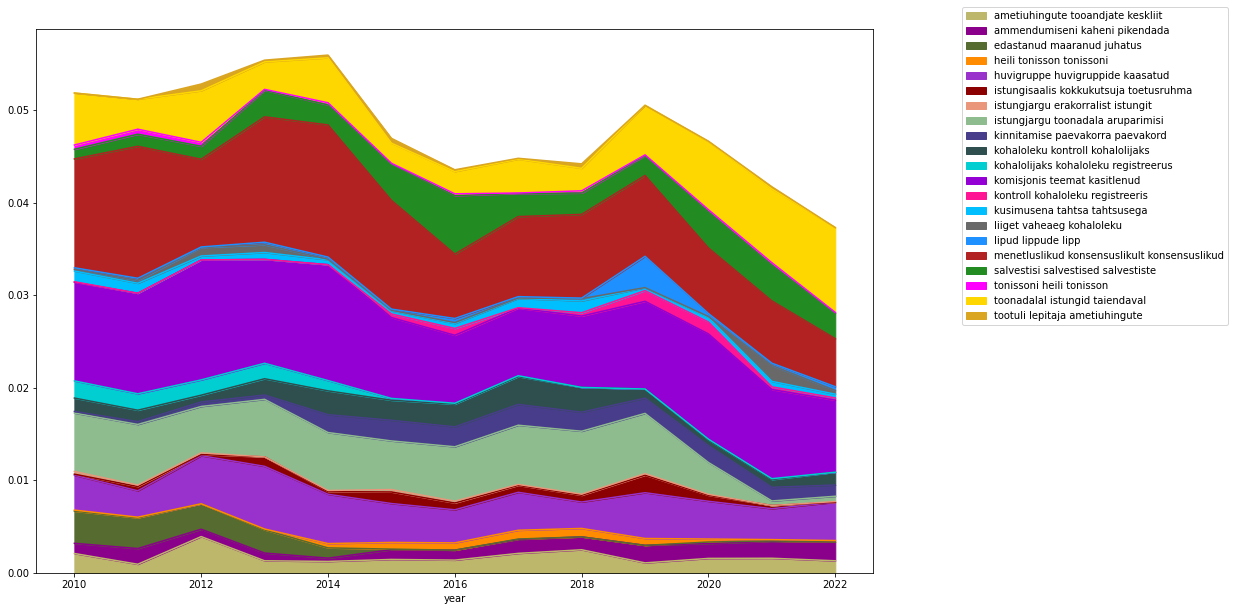

In [25]:
cluster_id=8
plot_topic_time_dynamics(df, cluster_id)

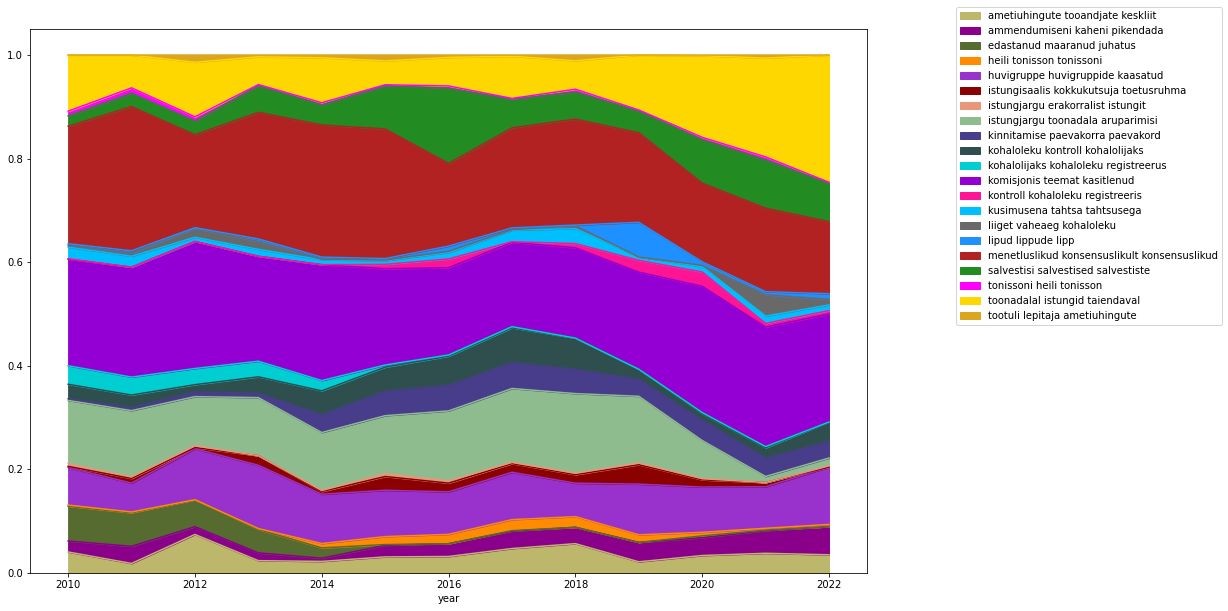

In [26]:
cluster_id=8
plot_topic_time_dynamics(df, cluster_id, normalize_timesteps=True)

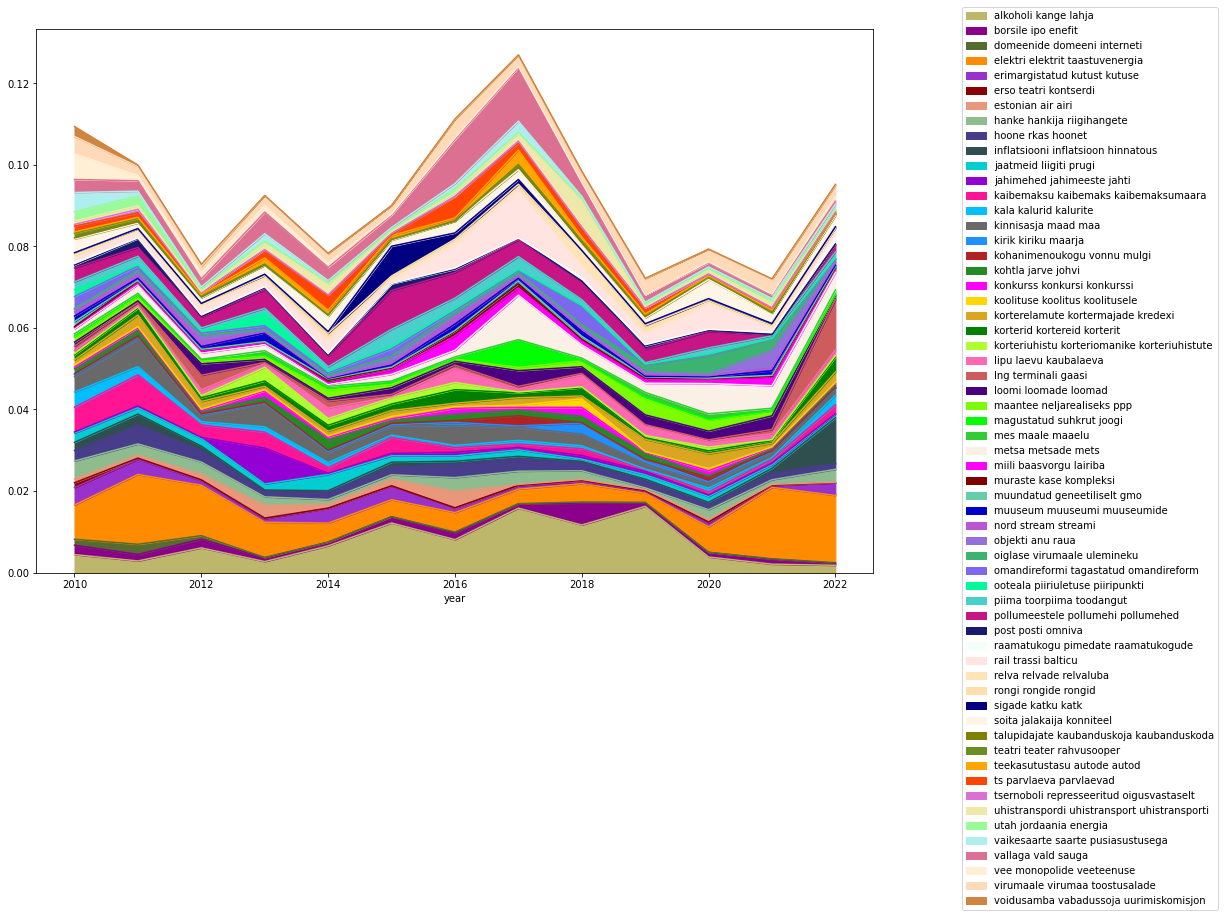

In [27]:
cluster_id=6
plot_topic_time_dynamics(df, cluster_id)

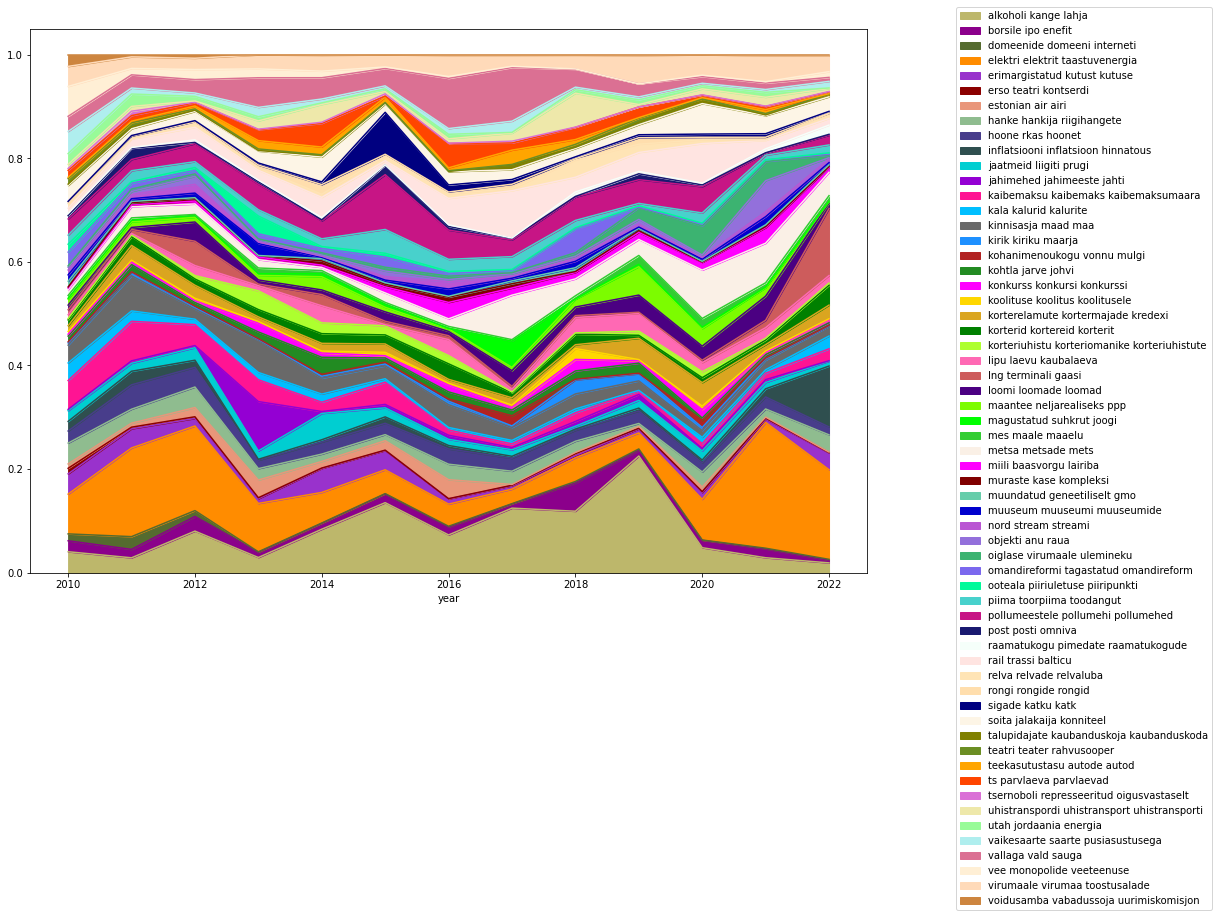

In [28]:
cluster_id=6
plot_topic_time_dynamics(df, cluster_id, normalize_timesteps=True)

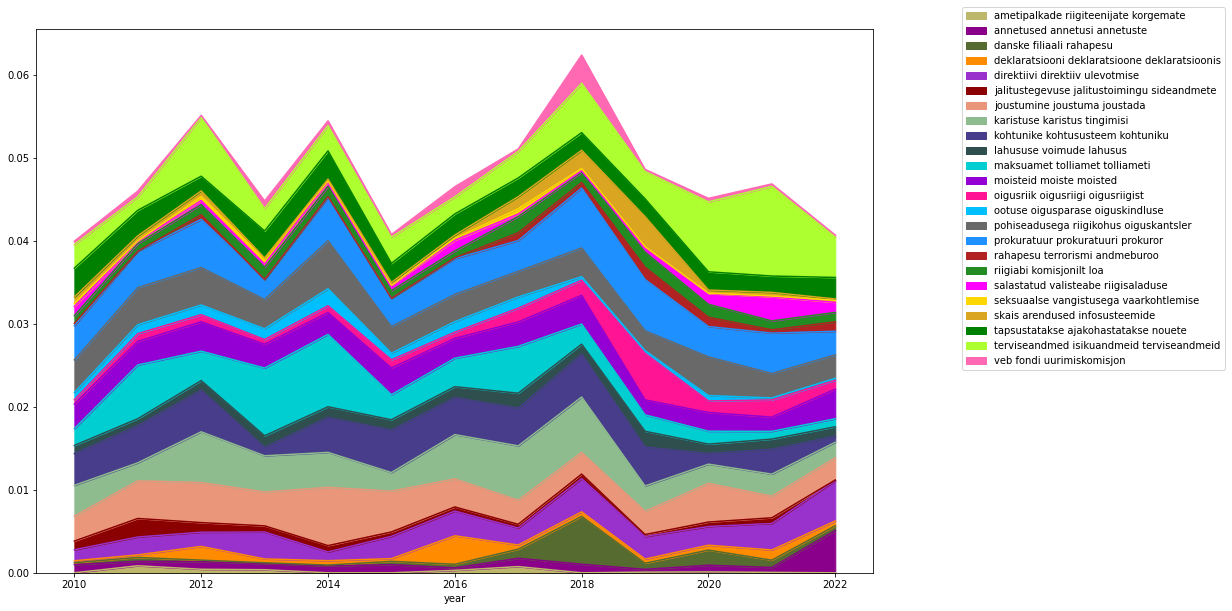

In [29]:
cluster_id=2
plot_topic_time_dynamics(df, cluster_id)

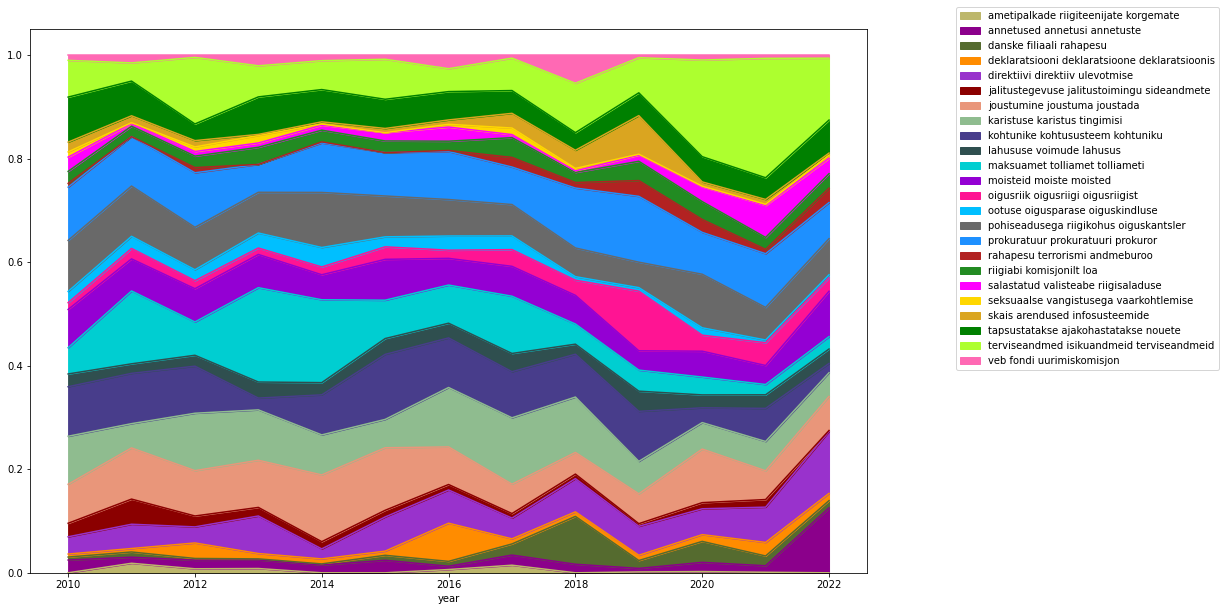

In [30]:
cluster_id=2
plot_topic_time_dynamics(df, cluster_id, normalize_timesteps=True)

## Most popular topics

<AxesSubplot:>

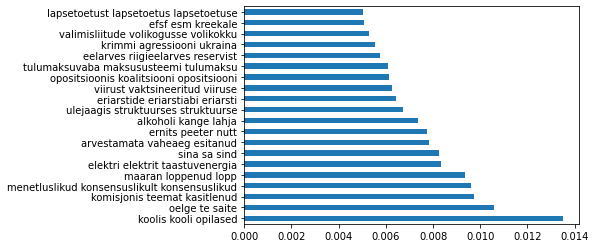

In [31]:
df.topic_words3.value_counts(normalize=True).head(20).plot(kind='barh')

<AxesSubplot:>

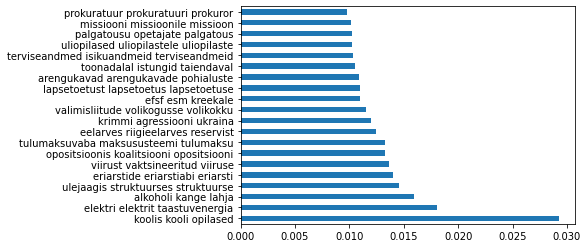

In [32]:
df_inform.topic_words3.value_counts(normalize=True).head(20).plot(kind='barh')

## Get pre-calculated trendy categories in each year

In [33]:
df_yearly_diffs_topic=pd.read_csv('data/interim/trending/yearly_comparisons/yearly_diffs_topic.csv')
df_yearly_diffs_topic_inform=pd.read_csv('data/interim/trending/yearly_comparisons/yearly_diffs_topic_inform.csv')

trendy_categories=Path('data/interim/trending/yearly_comparisons/trendy_categories.txt').\
    read_text().split('\n')
trendy_categories_inform=Path('data/interim/trending/yearly_comparisons/trendy_categories_inform.txt').\
    read_text().split('\n')

In [34]:
df_yearly_diffs_topic.head()

2010 vs 2011  \
0  kodualuse maamaksu maamaksust 1.713% -> 10.486% (512.243%)      
1  efsf esm kreekale 2.474% -> 9.067% (266.535%)                   
2  uliopilased uliopilastele uliopilaste 6.66% -> 6.79% (1.945%)   
3  palgatousu opetajate palgatous 1.998% -> 3.997% (100.018%)      
4  elektri elektrit taastuvenergia 13.796% -> 9.54% (-30.85%)      

                                                         2011 vs 2012  \
0  arvestamata vaheaeg esitanud 3.886% -> 8.285% (113.22%)              
1  missiooni missioonile missioon 4.229% -> 6.062% (43.347%)            
2  vaheaega kumneminutilist haaletust 1.6% -> 4.082% (155.102%)         
3  lapsetoetust lapsetoetus lapsetoetuse 6.857% -> 6.579% (-4.051%)     
4  terviseandmed isikuandmeid terviseandmeid 2.4% -> 3.533% (47.223%)   

                                                      2012 vs 2013  \
0  haaletada haaletas haaletusele 6.438% -> 8.449% (31.247%)         
1  arvestamata vaheaeg esitanud 23.348% -> 16.527% (-29.212%)        
2  teede teehoiuks teedele 1.373% -> 3.9% (183.948%)                 
3  jahimehed jahimeeste jahti 0.429% -> 4.41% (927.623%)             
4  valimisliitude volikogusse volikokku 1.888% -> 3.668% (94.216%)   

                                                          2013 vs 2014  \
0  missiooni missioonile missioon 7.237% -> 6.453% (-10.834%)            
1  abielu kooselu samasooliste 1.645% -> 6.921% (320.822%)               
2  krimmi agressiooni ukraina 6.25% -> 6.056% (-3.1%)                    
3  helir valdor seeder 1.974% -> 5.768% (192.237%)                       
4  toovoimereformi toovoimega toovoimereform 0.987% -> 7.895% (700.0%)   

                                                  2014 vs 2015  \
0  palgatousu opetajate palgatous 5.663% -> 6.072% (7.228%)      
1  pollumeestele pollumehi pollumehed 5.92% -> 5.503% (-7.05%)   
2  sigade katku katk 0.901% -> 4.213% (367.59%)                  
3  efsf esm kreekale 5.534% -> 4.706% (-14.966%)                 
4  pagulasi pagulased pagulaste 0.257% -> 8.159% (3069.924%)     

                                                   2015 vs 2016  \
0  vallaga vald sauga 4.777% -> 6.324% (32.384%)                  
1  arvestamata vaheaeg esitanud 7.373% -> 7.473% (1.365%)         
2  rail trassi balticu 1.142% -> 3.334% (191.902%)                
3  lugupeetav lugupeetavad eesistuja 2.492% -> 3.507% (40.709%)   
4  haale valimispaeval valimiste 1.558% -> 2.874% (84.536%)       

                                                     2016 vs 2017  \
0  kruuse urmas lahkunud 1.141% -> 7.094% (521.783%)                
1  metsa metsade mets 2.215% -> 5.504% (148.499%)                   
2  jurgen ligi ligil 1.007% -> 2.878% (185.887%)                    
3  ulejaagis struktuurses struktuurse 7.919% -> 6.387% (-19.347%)   
4  alkoholi kange lahja 11.074% -> 7.978% (-27.958%)                

                                                            2017 vs 2018  \
0  danske filiaali rahapesu 2.537% -> 4.279% (68.643%)                     
1  borsile ipo enefit 2.307% -> 4.009% (73.791%)                           
2  omandireformi tagastatud omandireform 1.269% -> 3.378% (166.278%)       
3  uhistranspordi uhistransport uhistransporti 4.498% -> 4.775% (6.147%)   
4  kodakondsust kodakondsuse kodanikuks 4.383% -> 4.685% (6.885%)          

                                                    2018 vs 2019  \
0  jarviku jarvik maaeluministri 4.748% -> 10.42% (119.475%)       
1  samba sammas sambasse 2.77% -> 8.697% (214.041%)                
2  pensionitous pensionitousu pension 4.253% -> 5.336% (25.461%)   
3  sikkut riina sikkuti 0.989% -> 2.815% (184.609%)                
4  jevgeni ossinovski toominister 1.286% -> 2.479% (92.789%)       

                                                              2019 vs 2020  \
0  viirust vaktsineeritud viiruse 1.898% -> 12.222% (544.001%)               
1  hadaolukorda eriolukord eriolukorra 1.606% -> 8.786% (447.144%)           
2  vorklaev puustusmaa 

In [35]:
df_yearly_diffs_topic_inform.head()

2010 vs 2011  \
0  kodualuse maamaksu maamaksust 0.227% -> 3.958% (1645.02%)           
1  efsf esm kreekale 0.328% -> 3.423% (944.701%)                       
2  uliopilased uliopilastele uliopilaste 0.882% -> 2.563% (190.564%)   
3  palgatousu opetajate palgatous 0.265% -> 1.509% (470.094%)          
4  elektri elektrit taastuvenergia 1.827% -> 3.602% (97.092%)          

                                                            2011 vs 2012  \
0  missiooni missioonile missioon 0.6% -> 2.633% (338.641%)                
1  lapsetoetust lapsetoetus lapsetoetuse 0.973% -> 2.858% (193.603%)       
2  terviseandmed isikuandmeid terviseandmeid 0.341% -> 1.535% (350.502%)   
3  apteeke apteegid apteekide 0.097% -> 0.82% (742.75%)                    
4  karistuse karistus tingimisi 0.454% -> 1.323% (191.273%)                

                                                       2012 vs 2013  \
0  teede teehoiuks teedele 0.212% -> 1.771% (736.748%)                
1  valimisliitude volikogusse volikokku 0.291% -> 1.666% (472.321%)   
2  jahimehed jahimeeste jahti 0.066% -> 2.003% (2928.232%)            
3  kinnisasja maad maa 0.318% -> 1.307% (311.733%)                    
4  noukogudesse ariuhingute noukogudes 0.357% -> 1.244% (248.276%)    

                                                             2013 vs 2014  \
0  abielu kooselu samasooliste 0.105% -> 2.431% (2205.311%)                 
1  missiooni missioonile missioon 0.464% -> 2.266% (388.46%)                
2  krimmi agressiooni ukraina 0.401% -> 2.127% (430.828%)                   
3  toovoimereformi toovoimega toovoimereform 0.063% -> 2.772% (4282.492%)   
4  valimisea valimisiga valimisoiguse 0.127% -> 1.418% (1020.637%)          

                                                     2014 vs 2015  \
0  palgatousu opetajate palgatous 0.557% -> 2.237% (301.615%)       
1  pollumeestele pollumehi pollumehed 0.582% -> 2.027% (248.139%)   
2  sigade katku katk 0.089% -> 1.552% (1651.328%)                   
3  pagulasi pagulased pagulaste 0.025% -> 3.006% (11772.742%)       
4  efsf esm kreekale 0.544% -> 1.734% (218.49%)                     

                                              2015 vs 2016  \
0  vallaga vald sauga 0.643% -> 2.311% (259.264%)            
1  rail trassi balticu 0.154% -> 1.218% (692.161%)           
2  haale valimispaeval valimiste 0.21% -> 1.05% (400.792%)   
3  ts parvlaeva parvlaevad 0.042% -> 1.124% (2579.235%)      
4  abielu kooselu samasooliste 0.531% -> 1.397% (162.916%)   

                                                     2016 vs 2017  \
0  metsa metsade mets 0.347% -> 2.288% (559.982%)                   
1  ulejaagis struktuurses struktuurse 1.239% -> 2.655% (114.204%)   
2  alkoholi kange lahja 1.733% -> 3.316% (91.334%)                  
3  rail trassi balticu 1.218% -> 2.434% (99.811%)                   
4  magustatud suhkrut joogi 0.021% -> 1.354% (6343.909%)            

                                                              2017 vs 2018  \
0  danske filiaali rahapesu 0.231% -> 1.212% (425.101%)                      
1  borsile ipo enefit 0.21% -> 1.136% (441.131%)                             
2  omandireformi tagastatud omandireform 0.115% -> 0.957% (729.108%)         
3  uhistranspordi uhistransport uhistransporti 0.409% -> 1.353% (230.509%)   
4  kodakondsust kodakondsuse kodanikuks 0.399% -> 1.327% (232.807%)          

                                                      2018 vs 2019  \
0  jarviku jarvik maaeluministri 0.612% -> 4.448% (626.286%)         
1  samba sammas sambasse 0.357% -> 3.713% (939.225%)                 
2  pensionitous pensionitousu pension 0.549% -> 2.278% (315.176%)    
3  koolis kooli opilased 3.279% -> 5.112% (55.887%)                  
4  kodakondsust kodakondsuse kodanikuks 1.327% -> 2.601% (95.989%)   

                                                               2019 vs 2020  \
0  viirust vaktsineeritud viiruse 0.233% -> 4.87% (1988.684%)                 
1  hadaolukorda eriolukor

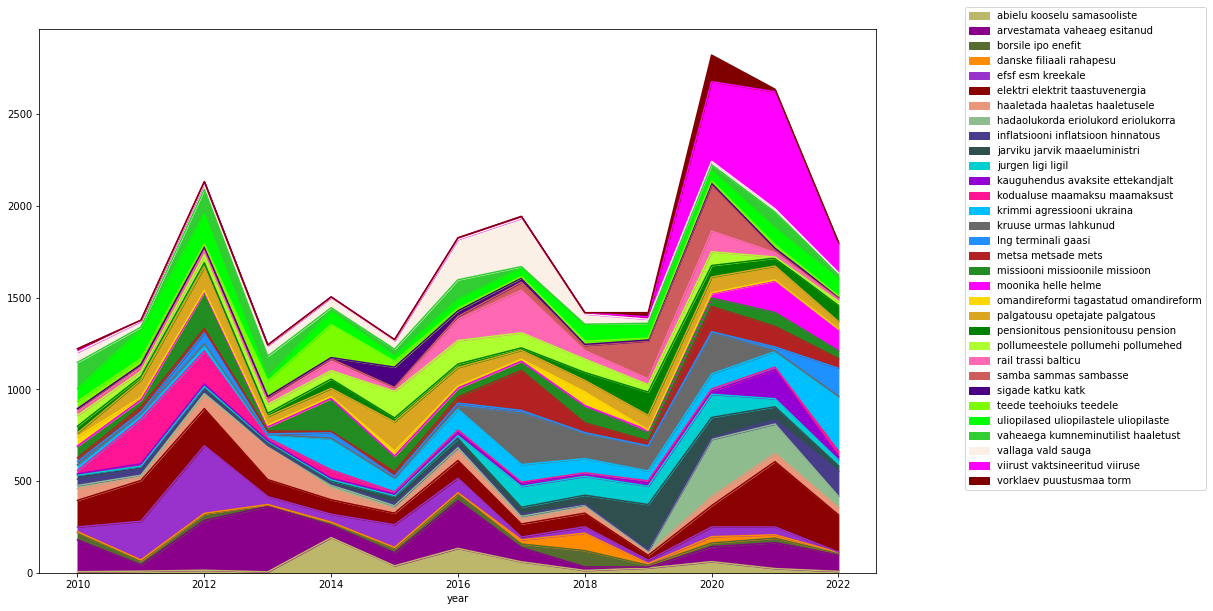

In [36]:
plot_topic_time_dynamics(df[df.topic_words3.isin(trendy_categories)], use_precentage=False)

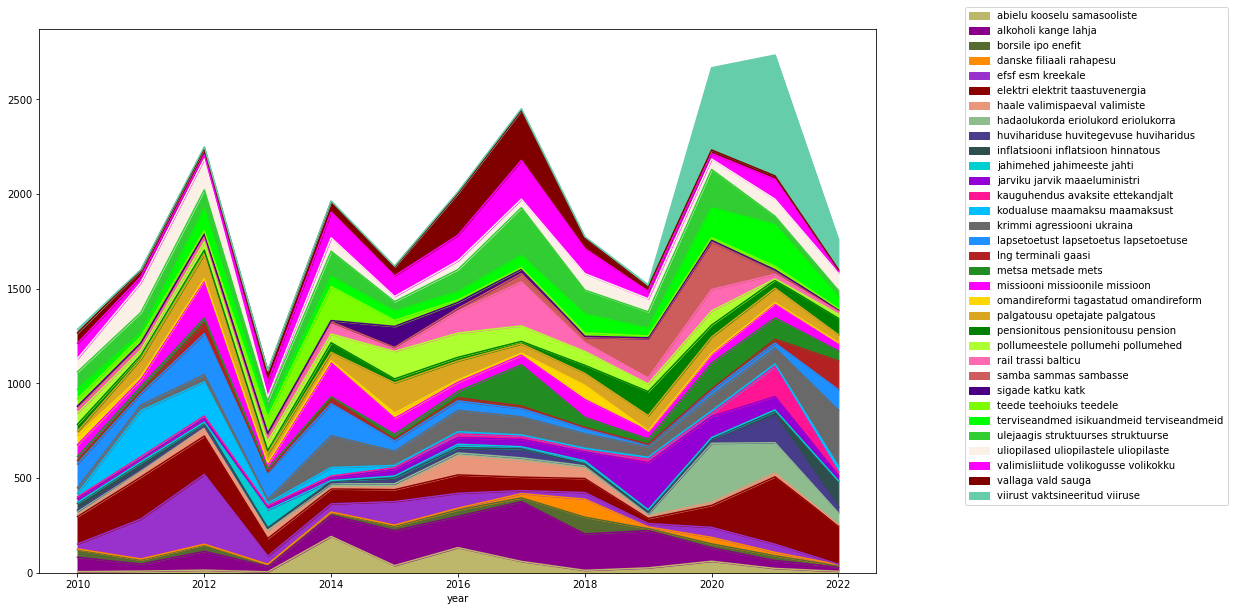

In [37]:
plot_topic_time_dynamics(df[df.topic_words3.isin(trendy_categories_inform)], use_precentage=False)

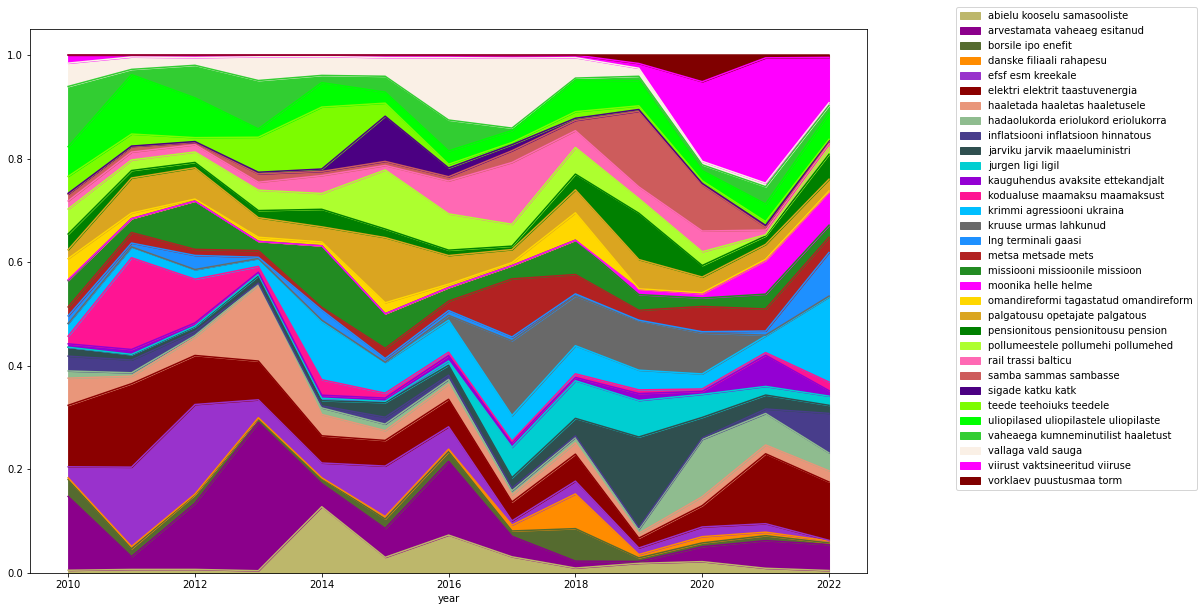

In [38]:
plot_topic_time_dynamics(df[df.topic_words3.isin(trendy_categories)])

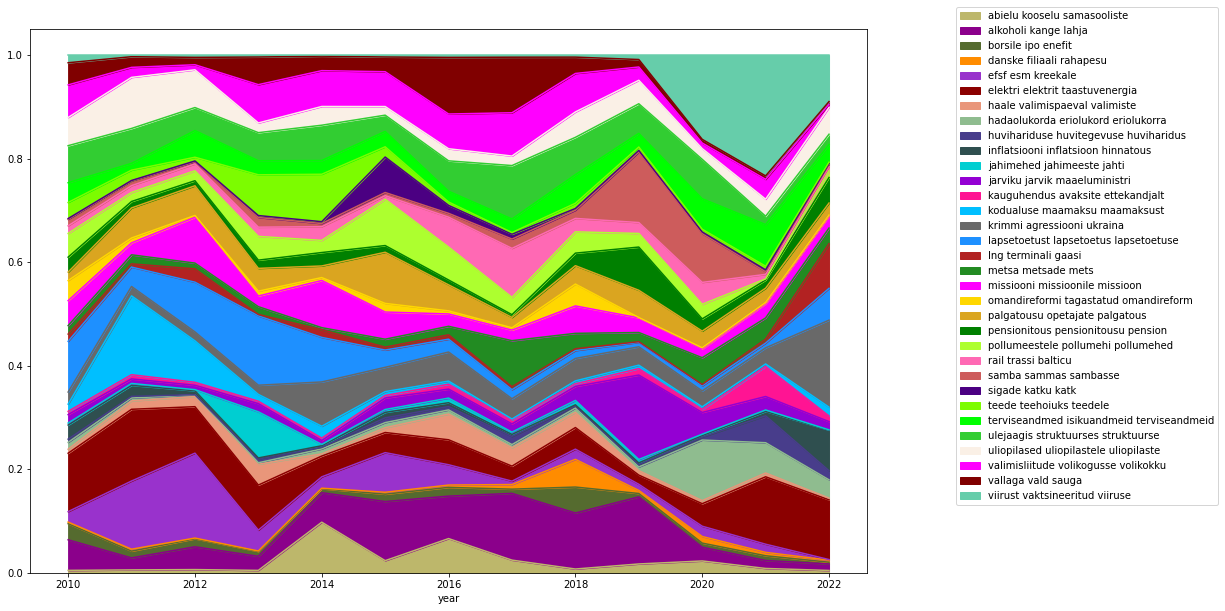

In [39]:
plot_topic_time_dynamics(df[df.topic_words3.isin(trendy_categories_inform)])

## Heatmap of topic, cluster popularity

<AxesSubplot:xlabel='topic_cluster', ylabel='year'>

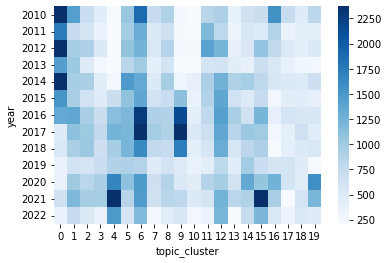

In [40]:
#topic clusters
sns.heatmap(df.groupby(['year'])['topic_cluster'].value_counts().unstack(), robust=True, cmap='Blues')

<AxesSubplot:xlabel='topic_cluster', ylabel='year'>

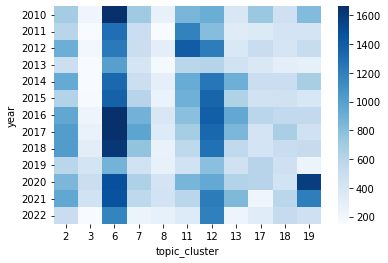

In [41]:
sns.heatmap(df_inform.groupby(['year'])['topic_cluster'].value_counts().unstack(), robust=True, cmap='Blues')

<AxesSubplot:xlabel='topic_id', ylabel='year'>

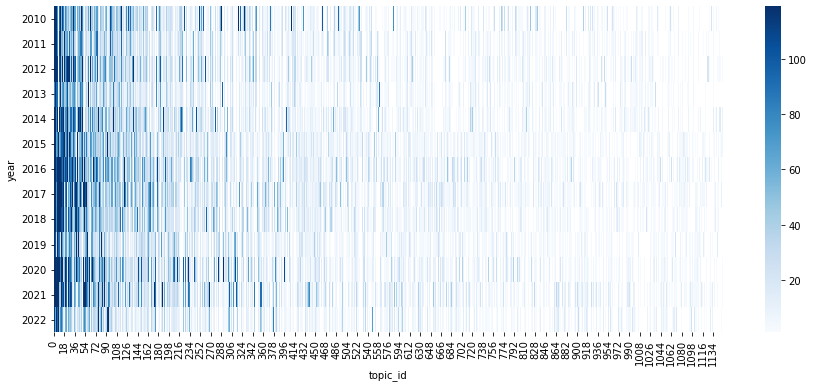

In [42]:
fig, ax =plt.subplots(figsize=(15,6))
sns.heatmap(df.groupby(['year'])['topic_id'].value_counts().unstack(), robust=True, cmap='Blues', ax =ax)

<AxesSubplot:xlabel='topic_id', ylabel='year'>

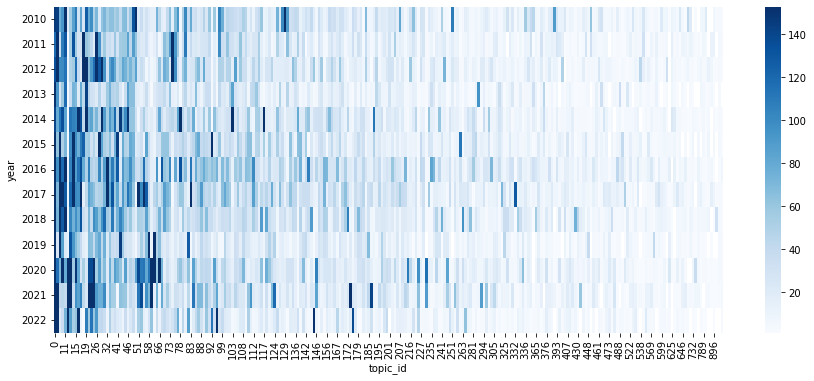

In [43]:
fig, ax =plt.subplots(figsize=(15,6))
sns.heatmap(df_inform.groupby(['year'])['topic_id'].value_counts().unstack(), robust=True, cmap='Blues', ax =ax)

## Compare years topic vectors

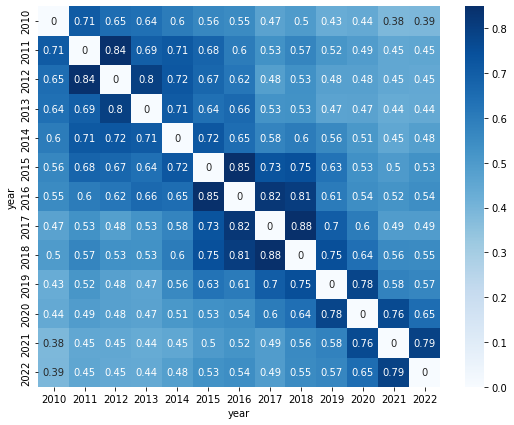

In [44]:
N_TOPICS=df.topic_words3.nunique()
df_year_topic_vecs, df_year_topic_cossim=create_plot_group_topvecs(df, N_TOPICS, 
                                                                   'year', 
                                                                   fillna=0, figsize=(9, 7))

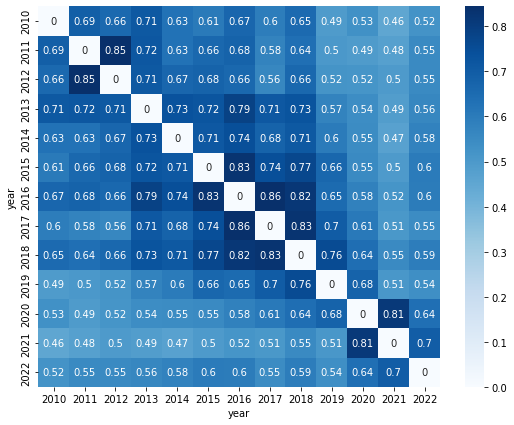

In [45]:
N_TOPICS=df_inform.topic_words3.nunique()
df_year_topic_vecs_inform, df_year_topic_cossim_inform=create_plot_group_topvecs(df_inform, N_TOPICS, 
                                                                   'year', 
                                                                   fillna=0, figsize=(9, 7))

<AxesSubplot:ylabel='year'>

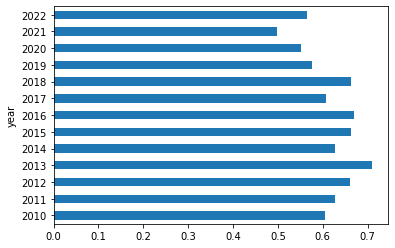

In [46]:
df_year_topic_cossim_inform.median(axis=1).plot(kind='barh')